In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Feature Analysis
Since accelerometer values are clustered together tightly, it is difficult to get a decision boundary with which we can reliably assign accurate labels to our IMU measurements. To work around this, we'll try and calculate the velocity of the board and visualize our calculations to see if the data can be easily distinguished into multiple classes.

In [2]:
simple_multi_dataset = pd.read_csv('simple_multi_dataset.csv')

In [3]:
simple_multi_dataset.head(10)

,ride_id,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,simple_label
0,15692,2018-11-09 19:17:41.238,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,PADDLING
1,15692,2018-11-09 19:17:41.502,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,PADDLING
2,15692,2018-11-09 19:17:41.733,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,PADDLING
3,15692,2018-11-09 19:17:41.997,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,PADDLING
4,15692,2018-11-09 19:17:42.228,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,PADDLING
5,15692,2018-11-09 19:17:42.492,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,PADDLING
6,15692,2018-11-09 19:17:42.756,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,PADDLING
7,15692,2018-11-09 19:17:42.987,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,PADDLING
8,15692,2018-11-09 19:17:43.251,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,PADDLING
9,15692,2018-11-09 19:17:43.482,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,PADDLING


## Visualizing IMU Acceleration Data

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


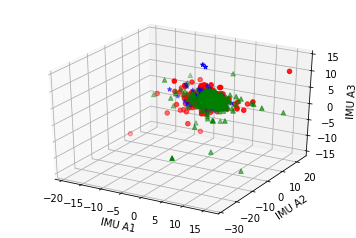

In [4]:
a1,a2,a3 = np.array(simple_multi_dataset['IMU A1']),np.array(simple_multi_dataset['IMU A2']),np.array(simple_multi_dataset['IMU A3']),
a2 = a2-9.81;

df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='PADDLING')]
a1_paddling = np.array(df['IMU A1'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='SURFING')]
a1_surfing = np.array(df['IMU A1'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='FLOATING')]
a1_floating = np.array(df['IMU A1'])

df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='PADDLING')]
a2_paddling = np.array(df['IMU A2'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='SURFING')]
a2_surfing = np.array(df['IMU A2'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='FLOATING')]
a2_floating = np.array(df['IMU A2'])

df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='PADDLING')]
a3_paddling = np.array(df['IMU A3'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='SURFING')]
a3_surfing = np.array(df['IMU A3'])
df = simple_multi_dataset.loc[(simple_multi_dataset['simple_label']=='FLOATING')]
a3_floating = np.array(df['IMU A3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('IMU A1')
ax.set_ylabel('IMU A2')
ax.set_zlabel('IMU A3')
fig.show()


The plot above shows datapoints belonging to classes PADDLING, SURFING, and FLOATING colored as red, blue, and green respectively. As can be seen, there isn't much separation within the data.

## Acceleration to Velocity
From kinematics, we know that acceleration is defined as follows: $$\mathbf{a}(t) = \frac{d}{dt}\mathbf{v}(t) \implies \mathbf{v}(t) = \int{\mathbf{a}(t)dt}$$
Using the trapezoidal rule, we can approximate the velocity of the fin which gives us: $$\mathbf{v}(t_N) = \sum_{k=1}^{N}\frac{\mathbf{a}(t_{k-1})+\mathbf{a}(t_k)}{2}\Delta t_k$$

In [5]:
t = [float(simple_multi_dataset['UTC'][i][-6:]) for i in range(len(simple_multi_dataset['UTC']))]
a1,a2,a3 = np.array(simple_multi_dataset['IMU A1']),np.array(simple_multi_dataset['IMU A2']),np.array(simple_multi_dataset['IMU A3']),
a2 = a2-9.81;

In [6]:
a1,a2,a3

(array([ 0.344538, -1.894959, -1.435575, ...,  1.052755,  0.746499,
         0.57423 ]),
 array([ 1.827728,  0.277307,  0.889819, ..., -0.928576, -0.603179,
        -0.296923]),
 array([2.775445, 0.861345, 1.607844, ..., 1.952382, 1.53128 , 1.512139]))

In [7]:
# Need to compute velocity at each point
v1 = np.zeros((len(simple_multi_dataset),1))
v2 = np.zeros((len(simple_multi_dataset),1))
v3 = np.zeros((len(simple_multi_dataset),1))
delta_t = 0.250; # TODO: calculate deltas using the UTC time

# Use magnitude as feature?
# stats stuff in windows (means, medians, max/min)
# fft?
# velocity towards shore

tmp = simple_multi_dataset['simple_label']
for i in range(len(simple_multi_dataset)):
    # delta_t = ?   
    if i < 1:
        v1[i] = a1[i]*delta_t/2
        v2[i] = a2[i]*delta_t/2
        v3[i] = a3[i]*delta_t/2
    else:
        v1[i] = v1[i] + (a1[i-1] + a1[i])*delta_t/2
        v2[i] = v2[i] + (a2[i-1] + a2[i])*delta_t/2  
        v3[i] = v3[i] + (a3[i-1] + a3[i])*delta_t/2

# Assign labels to velocity measurements
v1_paddling = np.zeros((len(a1_paddling),1))
v2_paddling = np.zeros((len(a2_paddling),1))
v3_paddling = np.zeros((len(a3_paddling),1))

v1_floating = np.zeros((len(a1_floating),1))
v2_floating = np.zeros((len(a2_floating),1))
v3_floating = np.zeros((len(a3_floating),1))

v1_surfing = np.zeros((len(a1_surfing),1))
v2_surfing = np.zeros((len(a2_surfing),1))
v3_surfing = np.zeros((len(a3_surfing),1))


paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_dataset['simple_label']:
    # Create 'windows': 3s, 5s, 10s, ...
    if label == 'PADDLING':        
        v1_paddling[paddle_idx] = v1[idx]
        v2_paddling[paddle_idx] = v2[idx]
        v3_paddling[paddle_idx] = v3[idx]        
        paddle_idx += 1
    elif label == 'FLOATING':
        v1_floating[float_idx] = v1[idx]
        v2_floating[float_idx] = v2[idx]
        v3_floating[float_idx] = v3[idx]
        float_idx += 1
    elif label == 'SURFING':
        v1_surfing[surf_idx] = v1[idx]
        v2_surfing[surf_idx] = v2[idx]
        v3_surfing[surf_idx] = v3[idx]
        surf_idx += 1
    idx += 1

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


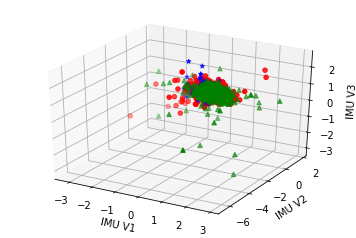

In [8]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(v1_floating,v2_floating,v3_floating,c='g',marker='^')
ax2.scatter(v1_paddling,v2_paddling,v3_paddling,c='r',marker='o')
ax2.scatter(v1_surfing,v2_surfing,v3_surfing,c='b',marker='*')
ax2.set_xlabel('IMU V1')
ax2.set_ylabel('IMU V2')
ax2.set_zlabel('IMU V3')
fig2.show()

# Creating Windows, Averaging velocity over a period $T$

Nothing seems to change very much, but we'll test out what we have by including the three velocity measurements as additional features.

In [9]:
v1_df = pd.DataFrame(v1,columns=['IMU V1'])
v2_df = pd.DataFrame(v2,columns=['IMU V2'])
v3_df = pd.DataFrame(v3,columns=['IMU V3'])

In [10]:
tmp = simple_multi_dataset.iloc[:, 2:-1]
tmp['IMU V1'] = v1_df
tmp['IMU V2'] = v2_df
tmp['IMU V3'] = v3_df
X = tmp.values  #selects everything until the last column listed

y = simple_multi_dataset.iloc[:, -1].values   #selects the last column 
print("X.shape:", X.shape)
print("y.shape:", y.shape)

print("y:", y)

print("*"*50)
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
# X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

from sklearn.model_selection import train_test_split

# For balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 0)

# For unbalanced dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X.shape: (6688, 12)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
X_resampled shape: (12936, 12)
y_resampled shape: (12936,)
X_train shape: (11642, 12)
y_train shape: (11642,)
X_test shape: (1294, 12)
y_test shape: (1294,)


In [11]:
tmp.head(10)

,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,IMU V1,IMU V2,IMU V3
0,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,0.043067,0.228466,0.346931
1,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,-0.193803,0.263129,0.454599
2,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,-0.416317,0.145891,0.308649
3,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,0.370857,-0.079016,0.445028
4,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,0.318219,0.016689,0.543126
5,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,1.641341,1.710667,1.581525
6,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,1.844714,1.315884,1.327907
7,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,-0.334967,0.167424,-0.102883
8,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,-0.562267,0.174602,0.260796
9,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,-0.196195,-0.081409,0.500059


In [12]:
X_train_res, y_train_res = X_train, y_train

#We still need to scale our data since, at least according to sklearn, MLP's do not handle unscaled data well.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_res)
X_train_res = scaler.transform(X_train_res)
X_test = scaler.transform(X_test)

# MLP test with velocity as additional features

In [13]:
from sklearn.neural_network import MLPClassifier
# A lower regularization coeffecient (alpha) improves accuracy across the board by around 1-5%
# The dataset appears to be heavily imbalanced, so SMOTE may need to be done or we need to choose a better dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,15), random_state=1, verbose=True)
clf.fit(X_train_res, y_train_res)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [14]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING", "MISC"])
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=["FLOATING", "PADDLING", "SURFING"])

print("When printing the confusion matrix, the first row tells us the number of correct predictions while the second row tells us the number of incorrect predictions.")
print(cm)

When printing the confusion matrix, the first row tells us the number of correct predictions while the second row tells us the number of incorrect predictions.
[[293  72  24]
 [101 292  36]
 [  5   6 465]]


In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print(score)

[0.80789022 0.81903945 0.81560892 0.81443299 0.80584192 0.80154639
 0.81685297 0.81083405 0.83061049 0.79707653]


In [16]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 399, 'PADDLING': 370, 'SURFING': 525}

In [17]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 3923, 'PADDLING': 3883, 'SURFING': 3836}

In [18]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 389, 'PADDLING': 429, 'SURFING': 476}

In [19]:
print("Average score from cross validation:")
print(sum(score)/len(score))

Average score from cross validation:
0.8119733931998032


In [20]:
from sklearn import metrics
print("Multiclass MLP Train Accuracy :: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Multiclass MLP Test Accuracy :: ", metrics.accuracy_score(y_test, clf.predict(X_test)))

Multiclass MLP Train Accuracy ::  0.43841264387562273
Multiclass MLP Test Accuracy ::  0.8114374034003091


# SVM test with velocity as additional features

In [21]:
#Training the algorithm: 
#The fit method is called to train the algorithm on the training data, which is passed as a parameter to the fit method.

print("Running SVM classifier.")


#******Note:**********
#** Also may need to scale the signals? So they influence the classifier the same....**
# https://stats.stackexchange.com/questions/65094/why-scaling-is-important-for-the-linear-svm-classification

#There are different types of kernel for SVMs, here we are using the "linear" kernel to see how it performs.
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_res, y_train_res) 

#Making predictions: use the predict method of the SVC class
y_pred = svclassifier.predict(X_test)  


#This takes a really long time to run!
print("Done.")

Running SVM classifier.
Done.


In [22]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

score = cross_val_score(estimator = svclassifier, X = X_train_res, y = y_train_res, cv = 10)
print(score)

[[192  82 115]
 [ 56 269 104]
 [104  20 352]]
              precision    recall  f1-score   support

    FLOATING       0.55      0.49      0.52       389
    PADDLING       0.73      0.63      0.67       429
     SURFING       0.62      0.74      0.67       476

   micro avg       0.63      0.63      0.63      1294
   macro avg       0.63      0.62      0.62      1294
weighted avg       0.63      0.63      0.63      1294

[0.62864494 0.62607204 0.61663808 0.62886598 0.60395189 0.60910653
 0.61650903 0.58469475 0.63026655 0.59071367]


In [23]:
print("Average score from cross validation:")
print(sum(score)/len(score))

from sklearn import metrics
print("Multiclass SVM Train Accuracy :: ", metrics.accuracy_score(y_train_res, svclassifier.predict(X_train_res)))
print("Multiclass SVM Test Accuracy :: ", metrics.accuracy_score(y_test, svclassifier.predict(X_test)))

Average score from cross validation:
0.6135463465538497
Multiclass SVM Train Accuracy ::  0.6144992269369524
Multiclass SVM Test Accuracy ::  0.6282843894899537


In [24]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'FLOATING': 3923, 'PADDLING': 3883, 'SURFING': 3836}

# Binning velocity values
In this section, we'll bin over several velocity and gyroscope values and compute the variances, medians, and means of each bin. Then, we will use these statistics as additional features to see if they can improve the performance of our models. We'll look at 1s, 5s, 10s, 15s, 20s, and 30s bins.

In [27]:
tmp.head(10)

,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,IMU V1,IMU V2,IMU V3
0,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,0.043067,0.228466,0.346931
1,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,-0.193803,0.263129,0.454599
2,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,-0.416317,0.145891,0.308649
3,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,0.370857,-0.079016,0.445028
4,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,0.318219,0.016689,0.543126
5,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,1.641341,1.710667,1.581525
6,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,1.844714,1.315884,1.327907
7,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,-0.334967,0.167424,-0.102883
8,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,-0.562267,0.174602,0.260796
9,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,-0.196195,-0.081409,0.500059


In [36]:
velocity = tmp[['IMU V1','IMU V2','IMU V3']]
gyro = tmp[['IMU G1','IMU G2','IMU G3']]
pd.concat([velocity,gyro],axis=1).head(10)

,IMU V1,IMU V2,IMU V3,IMU G1,IMU G2,IMU G3
0,0.043067,0.228466,0.346931,-2.195122,-5.000000,8.414634
1,-0.193803,0.263129,0.454599,16.585366,-4.146341,7.560976
2,-0.416317,0.145891,0.308649,1.829268,-6.219512,-4.390244
3,0.370857,-0.079016,0.445028,-7.317073,-6.097561,3.292683
4,0.318219,0.016689,0.543126,3.902439,-8.170732,20.121951
5,1.641341,1.710667,1.581525,-32.439024,0.121951,2.195122
6,1.844714,1.315884,1.327907,57.073171,22.682927,-15.487805
7,-0.334967,0.167424,-0.102883,28.414634,-17.317073,5.853659
8,-0.562267,0.174602,0.260796,-0.365854,5.975610,10.853659
9,-0.196195,-0.081409,0.500059,-12.804878,-0.365854,4.756098


We still need to separate this data into bins. To do this, we'll just create a new dataframe for each metric we're interested in and keep adding in entries as we calculate them from the dataframe above. We'll start off with 1s bins, which corresponds to four IMU measurements since our sampling rate is approximately 0.250s. 

In [63]:
bin_size = 4
bins_needed = int(len(velocity)/bin_size)
print('Number of bins needed: %d' % bins_needed)

Number of bins needed: 1672


In [183]:
v1_tmp,v2_tmp,v3_tmp = np.array(velocity['IMU V1']), np.array(velocity['IMU V2']), np.array(velocity['IMU V3'])
g1_tmp,g2_tmp,g3_tmp = np.array(gyro['IMU G1']),np.array(gyro['IMU G2']),np.array(gyro['IMU G3'])

In [187]:
# use idx to denote beginning of a bin, and offset to denote the end of a bin
# offset is initialized to the bin size, and then incremented with each iteration
# each iteration of the loop will look at four IMU measurements, compute then store metrics, and finally shift
# the offset and index
offset = bin_size
avgs_v,meds_v,avgs_g,meds_g = [],[],[],[]
for idx in range(0,len(v1_tmp)+1,bin_size):
    
    # velocity
    tmp1,tmp2,tmp3 = v1_tmp[idx:offset],v2_tmp[idx:offset],v3_tmp[idx:offset]
    avg1,avg2,avg3 = np.mean(tmp1),np.mean(tmp2),np.mean(tmp3)
    med1,med2,med3 = np.median(tmp1),np.median(tmp2),np.median(tmp3)
    
    avgs_v.append([avg1,avg2,avg3])
    meds_v.append([med1,med2,med3])
    
    # gyroscope
    tmp4,tmp5,tmp6 = g1_tmp[idx:offset],g2_tmp[idx:offset],g3_tmp[idx:offset]
    avg4,avg5,avg6 = np.mean(tmp4),np.mean(tmp5),np.mean(tmp6)
    med4,med5,med6 = np.median(tmp1),np.median(tmp2),np.median(tmp3)
    
    avgs_g.append([avg4,avg5,avg6])
    meds_g.append([med4,med5,med6])
    
    avg1,avg2,avg3 = np.mean(tmp1),np.mean(tmp2),np.mean(tmp3)
    med1,med2,med3 = np.median(tmp1),np.median(tmp2),np.median(tmp3)
    offset += 4
    
    
df1 = pd.DataFrame(avgs_v, columns=['AVG V1','AVG V2','AVG V3'])
df2 = pd.DataFrame(meds_v, columns=['MED V1','MED V2','MED V3'])
df3 = pd.DataFrame(avgs_v, columns=['AVG G1','AVG G2','AVG G3'])
df4 = pd.DataFrame(meds_v, columns=['MED G1','MED G2','MED G3'])
df_stats = pd.concat([df1,df2,df3,df4],axis=1)
df_stats.drop(1672); # FIXME

/Users/seankamano/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/seankamano/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [188]:
df_stats

,AVG V1,AVG V2,AVG V3,MED V1,MED V2,MED V3,AVG G1,AVG G2,AVG G3,MED G1,MED G2,MED G3
0,-0.049049,0.139618,0.388802,-0.075368,0.187178,0.395979,-0.049049,0.139618,0.388802,-0.075368,0.187178,0.395979
1,0.867327,0.802666,0.837419,0.979780,0.741654,0.935516,0.867327,0.802666,0.837419,0.979780,0.741654,0.935516
2,-0.237468,0.090860,0.319415,-0.155521,0.124357,0.264385,-0.237468,0.090860,0.319415,-0.155521,0.124357,0.264385
3,0.049647,-0.009032,0.384614,0.045460,-0.021593,0.395979,0.049647,-0.009032,0.384614,0.045460,-0.021593,0.395979
4,0.039478,-0.183095,0.338556,0.045460,-0.155580,0.338556,0.039478,-0.183095,0.338556,0.045460,-0.155580,0.338556
5,-0.029310,0.070523,0.321210,-0.027515,0.111198,0.318219,-0.029310,0.070523,0.321210,-0.027515,0.111198,0.318219
6,-0.017945,-0.045519,0.459982,-0.023926,-0.073034,0.413924,-0.017945,-0.045519,0.459982,-0.023926,-0.073034,0.413924
7,-0.064601,-0.098157,0.463571,-0.057423,-0.101746,0.484507,-0.064601,-0.098157,0.463571,-0.057423,-0.101746,0.484507
8,-0.093312,0.048989,0.372651,-0.082546,0.063345,0.382820,-0.093312,0.048989,0.372651,-0.082546,0.063345,0.382820
9,0.028711,-0.010826,0.433065,0.021534,0.074112,0.428280,0.028711,-0.010826,0.433065,0.021534,0.074112,0.428280


/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


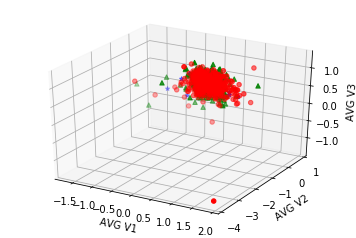

In [151]:
new_features = pd.concat([simple_multi_dataset,df_stats],axis=1)
df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a1_paddling = np.array(df['AVG V1'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a1_surfing = np.array(df['AVG V1'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a1_floating = np.array(df['AVG V1'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a2_paddling = np.array(df['AVG V2'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a2_surfing = np.array(df['AVG V2'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a2_floating = np.array(df['AVG V2'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a3_paddling = np.array(df['AVG V3'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a3_surfing = np.array(df['AVG V3'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a3_floating = np.array(df['AVG V3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('AVG V1')
ax.set_ylabel('AVG V2')
ax.set_zlabel('AVG V3')
fig.show()

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


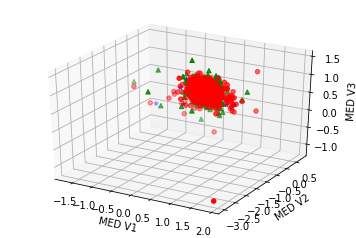

In [152]:
new_features = pd.concat([simple_multi_dataset,df_stats],axis=1)
df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a1_paddling = np.array(df['MED V1'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a1_surfing = np.array(df['MED V1'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a1_floating = np.array(df['MED V1'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a2_paddling = np.array(df['MED V2'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a2_surfing = np.array(df['MED V2'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a2_floating = np.array(df['MED V2'])

df = new_features.loc[(new_features['simple_label']=='PADDLING')]
a3_paddling = np.array(df['MED V3'])
df = new_features.loc[(new_features['simple_label']=='SURFING')]
a3_surfing = np.array(df['MED V3'])
df = new_features.loc[(new_features['simple_label']=='FLOATING')]
a3_floating = np.array(df['MED V3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('MED V1')
ax.set_ylabel('MED V2')
ax.set_zlabel('MED V3')
fig.show()

In [156]:
df_stats.head(10)

,AVG V1,AVG V2,AVG V3,MED V1,MED V2,MED V3
0,-0.049049,0.139618,0.388802,-0.075368,0.187178,0.395979
1,0.867327,0.802666,0.837419,0.979780,0.741654,0.935516
2,-0.237468,0.090860,0.319415,-0.155521,0.124357,0.264385
3,0.049647,-0.009032,0.384614,0.045460,-0.021593,0.395979
4,0.039478,-0.183095,0.338556,0.045460,-0.155580,0.338556
5,-0.029310,0.070523,0.321210,-0.027515,0.111198,0.318219
6,-0.017945,-0.045519,0.459982,-0.023926,-0.073034,0.413924
7,-0.064601,-0.098157,0.463571,-0.057423,-0.101746,0.484507
8,-0.093312,0.048989,0.372651,-0.082546,0.063345,0.382820
9,0.028711,-0.010826,0.433065,0.021534,0.074112,0.428280


In [179]:
df_stats

In [171]:
a,b=df_stats.iloc[0],df_stats.iloc[1]

In [182]:
pd.concat([a]*4)

AVG V1   -0.049049
AVG V2    0.139618
AVG V3    0.388802
MED V1   -0.075368
MED V2    0.187178
MED V3    0.395979
AVG V1   -0.049049
AVG V2    0.139618
AVG V3    0.388802
MED V1   -0.075368
MED V2    0.187178
MED V3    0.395979
AVG V1   -0.049049
AVG V2    0.139618
AVG V3    0.388802
MED V1   -0.075368
MED V2    0.187178
MED V3    0.395979
AVG V1   -0.049049
AVG V2    0.139618
AVG V3    0.388802
MED V1   -0.075368
MED V2    0.187178
MED V3    0.395979
Name: 0, dtype: float64

In [178]:
a.append()

AVG V1   -0.049049
AVG V2    0.139618
AVG V3    0.388802
MED V1   -0.075368
MED V2    0.187178
MED V3    0.395979
AVG V1    0.867327
AVG V2    0.802666
AVG V3    0.837419
MED V1    0.979780
MED V2    0.741654
MED V3    0.935516
dtype: float64

""
